<a href="https://colab.research.google.com/github/BrajanNieto/stats-prob-py/blob/main/01.%20Ex-Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Concepts - Exercises in Python**

---

This script includes exercises and practical implementations of key probability concepts using Python. It is designed to help reinforce theoretical knowledge through hands-on coding examples.

**Topics Covered:**  

* **Fundamental Probability Rules**: Addition and Multiplication rules, Conditional probability, and Bayes' theorem.  
* **Discrete and Continuous Distributions**: Binomial, Poisson, Normal, and others.  
* **Random Variables and Simulations**: Monte Carlo methods and more.  

**Author:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

---

In [1]:
#lib
import numpy as np

## Ex 1:
Three people enter an elevator on the first floor of a building with 10 floors. Each person is equally likely to choose any floor from 2 to 10 (independently). What is the probability that all three people want to go to consecutive floors?


In [ ]:
np.random.randint(2,11,3)

array([7, 7, 6])

In [ ]:
np.random.seed(100)
n_simulaciones = 10_000_000


resultados = np.random.randint(2, 11, (n_simulaciones, 3))
ordenados = np.sort(resultados, axis=1)
es_consecutivo = (ordenados[:, 1] - ordenados[:, 0] == 1) & (ordenados[:, 2] - ordenados[:, 1] == 1)
probabilidad = np.sum(es_consecutivo) / n_simulaciones

# Resultado
print(f"La probabilidad de que las 3 personas elijan pisos consecutivos es: {probabilidad:.6f}")


La probabilidad de que las 3 personas elijan pisos consecutivos es: 0.057647



#### Solution  

#### 1. Sample Space:  
Each person has 9 possible choices (floors 2 to 10).  
For three people, the total number of combinations is:  
$9^3 = 729$

#### 2. Favorable Outcomes:  
To have consecutive floors, the chosen floors can be represented as \([x, x+1, x+2]\), where \(x\) is the smallest floor:  
- $x$ can take values from $2$ to $8$ (as $x+2 \leq 10$).
- For each \(x\), the three people can arrive at the floors in any order. There are \(3! = 6\) permutations for each set of consecutive floors.

Thus, the total number of favorable outcomes is:  
7 * 6 = 42

#### 3. Probability:  
The probability is the ratio of favorable outcomes to the total sample space:  
$P = \frac{\text{Favorable Outcomes}}{\text{Sample Space}} = \frac{42}{729} = \frac{14}{243} \approx 0.0576$

## Ex 2:

In [2]:
import random

# Definir la urna con las bolas: 'R' representa roja, 'A' representa azul
urna = ['R', 'R', 'R', 'A']

# Número de simulaciones
n_simulaciones = 100000

# Contadores
total_veces_primera_roja = 0
total_veces_segunda_roja = 0

for _ in range(n_simulaciones):
    # Extraer dos bolas sin reemplazo
    seleccionadas = random.sample(urna, 2)

    # Contar casos
    if seleccionadas[0] == 'R':
        total_veces_primera_roja += 1
        if seleccionadas[1] == 'R':
            total_veces_segunda_roja += 1

# Calcular probabilidades
prob_primera_roja = total_veces_primera_roja / n_simulaciones
prob_segunda_roja_dado_primera_roja = total_veces_segunda_roja / total_veces_primera_roja

# Mostrar resultados
print(f"Probabilidad de que la primera bola sea roja: {prob_primera_roja:.5f}")
print(f"Probabilidad de que la segunda bola sea roja dado que la primera fue roja: {prob_segunda_roja_dado_primera_roja:.5f}")


Probabilidad de que la primera bola sea roja: 0.74975
Probabilidad de que la segunda bola sea roja dado que la primera fue roja: 0.66438


# Variables aleatorias discretas

## **Distribución binomial**

 $X$ tiene distribución binomial con parámetros $n$ y $p$ si

 $$P(X=k)= \binom{n}{k} p^{k}(1-p)^{n-k}$$

 para $k=0, \dots, n$.

In [1]:
from scipy.stats import binom

Los valores de la distribución son dados por el método pmf (*probability mass function*)


In [2]:
n=5
p=0.1
k=3
binom.pmf(k, n, p)

0.0081

Gráfica de la distribución

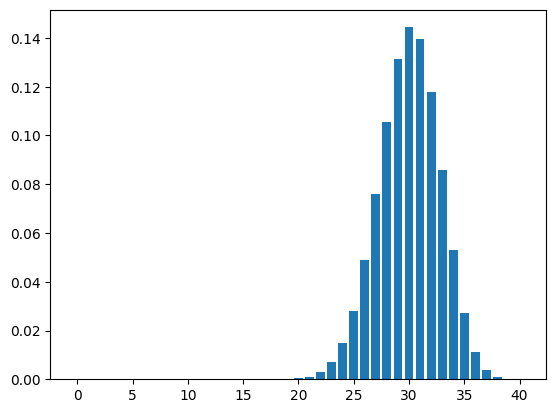

In [3]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

La distribución acumulada se calcula con el método cdf (cumulative density function)

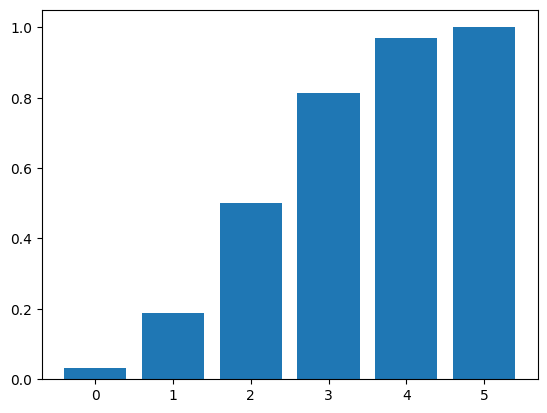

In [4]:
n=5
p=0.5
plt.bar( np.arange(n+1),binom.cdf(np.arange(n+1), n, p))
plt.show()

Data simulada y su histograma. Notemos que es consistente con la distribución.

In [7]:
n=5
p=0.5
binom.rvs(n,  p, size=100)

array([2, 2, 4, 1, 0, 1, 1, 4, 2, 4, 3, 1, 3, 3, 3, 3, 2, 4, 3, 2, 4, 2,
       2, 3, 1, 3, 1, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1,
       4, 4, 2, 2, 3, 3, 4, 2, 3, 2, 5, 0, 0, 0, 0, 3, 2, 4, 2, 4, 2, 2,
       1, 4, 0, 3, 2, 2, 2, 3, 4, 2, 2, 3, 5, 2, 2, 3, 1, 4, 3, 2, 2, 3,
       4, 2, 2, 4, 2, 2, 4, 4, 0, 3, 4, 1])

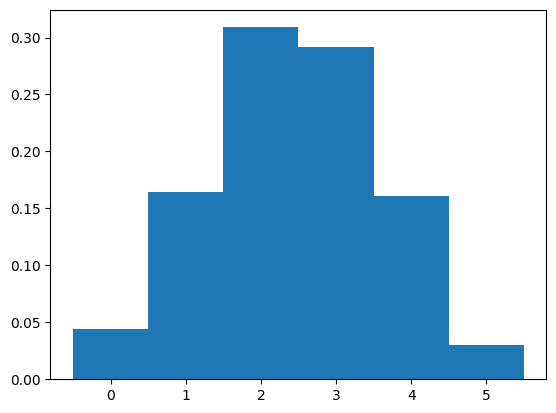

In [6]:
n=5
p=0.5
plt.hist(binom.rvs(n, p, size=1000), bins=np.arange(-0.5, 6.5, 1), density=True), #false cuenta true brinda probabilidades
plt.show()

## **Ejercicio 1:**
Se muestra un aviso online a $40$ personas. La probabilidad de que alguien haga click en el aviso es de $0.75$. Halle la probabilidad de los siguientes eventos.

a) exactamente $20$ personas hagan click.

b) a lo más $20$ personas hacen click.

c) al menos $20$ personas hacen click.

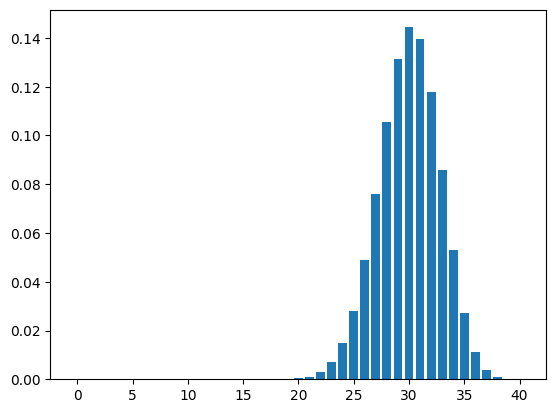

In [8]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

In [9]:
n=40
p=0.75
binom.pmf(20, n, p)

0.00039757702137157343

In [10]:
binom.cdf(20, n, p)

0.0005724311071761386

In [11]:
1-binom.cdf(19, n, p)

0.9998251459141955